# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [3]:
student_data = pd.DataFrame({'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30],
                        'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})

Draw a dispersion diagram (scatter plot) for the data.

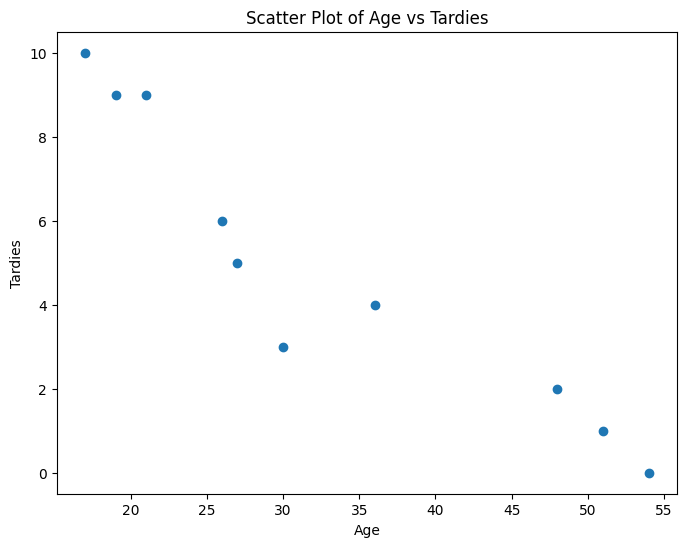

In [4]:
import matplotlib.pyplot as plt

# Plotting the scatter plot
plt.figure(figsize=(8,6))
plt.scatter(student_data['Age'], student_data['Tardies'])
plt.title('Scatter Plot of Age vs Tardies')
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.show()


Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

*your explanation here*

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [5]:

covariance = student_data.cov().iloc[0, 1] 
correlation = student_data.corr().iloc[0, 1]

print(f"Covariance: {covariance}")
print(f"Correlation: {correlation}")


Covariance: -45.56666666666666
Correlation: -0.9391626886887121


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [6]:
from sklearn.linear_model import LinearRegression


model = LinearRegression()


X = student_data['Age'].values.reshape(-1, 1)
y = student_data['Tardies']


model.fit(X, y)


print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_}")


Intercept: 12.888803363135771
Coefficient: [-0.24282077]


Plot your regression model on your scatter plot.

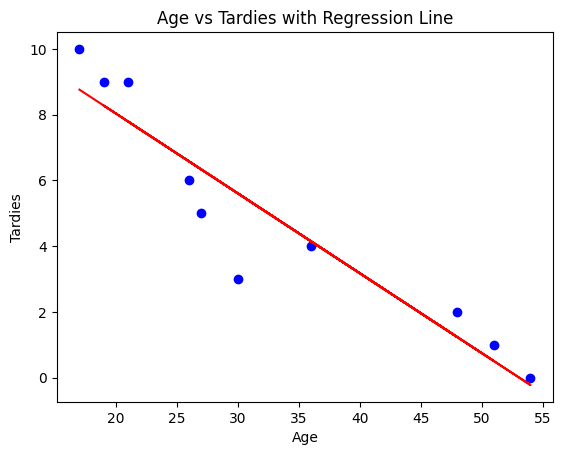

In [7]:

plt.scatter(student_data['Age'], student_data['Tardies'], color='blue')
plt.plot(student_data['Age'], model.predict(X), color='red')
plt.title('Age vs Tardies with Regression Line')
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.show()


Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

*your explanation here*

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [8]:

vehicles = pd.read_csv("vehicles.csv")

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [9]:
data = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']]

# Calculate correlations
correlations = data.corr()
print(correlations)

                             Year  Cylinders  Fuel Barrels/Year  Combined MPG  \
Year                     1.000000   0.082469          -0.221084      0.204751   
Cylinders                0.082469   1.000000           0.739517     -0.698648   
Fuel Barrels/Year       -0.221084   0.739517           1.000000     -0.909743   
Combined MPG             0.204751  -0.698648          -0.909743      1.000000   
Fuel Cost/Year          -0.091913   0.778153           0.916208     -0.875185   
CO2 Emission Grams/Mile -0.222300   0.752393           0.986189     -0.926229   

                         Fuel Cost/Year  CO2 Emission Grams/Mile  
Year                          -0.091913                -0.222300  
Cylinders                      0.778153                 0.752393  
Fuel Barrels/Year              0.916208                 0.986189  
Combined MPG                  -0.875185                -0.926229  
Fuel Cost/Year                 1.000000                 0.930865  
CO2 Emission Grams/Mile       

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [10]:

X = data[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
y = data['CO2 Emission Grams/Mile']


model = LinearRegression()
model.fit(X, y)


print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")


Intercept: 769.888283646566
Coefficients: [-0.32061673  1.87879976 19.05292507 -3.04039938  0.03230948]


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [11]:
import statsmodels.api as sm


X_with_const = sm.add_constant(X)
model_sm = sm.OLS(y, X_with_const).fit()
print(model_sm.summary())


                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Thu, 12 Dec 2024   Prob (F-statistic):               0.00
Time:                             20:00:21   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [12]:
party_data = pd.DataFrame({'X': [1, 3, 4, 6, 8, 9, 11, 14],
                        'Y': [1, 2, 4, 4, 5, 7, 8, 13]})


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

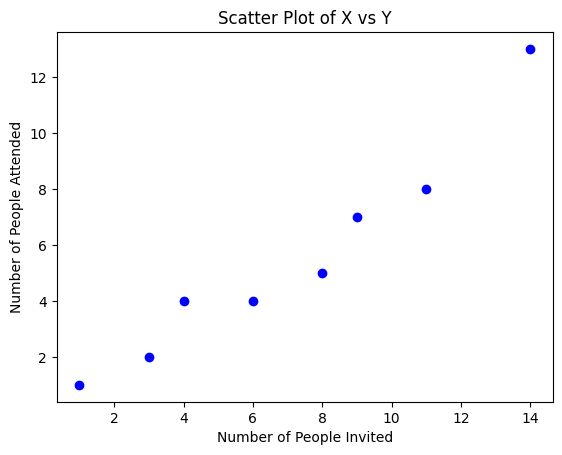

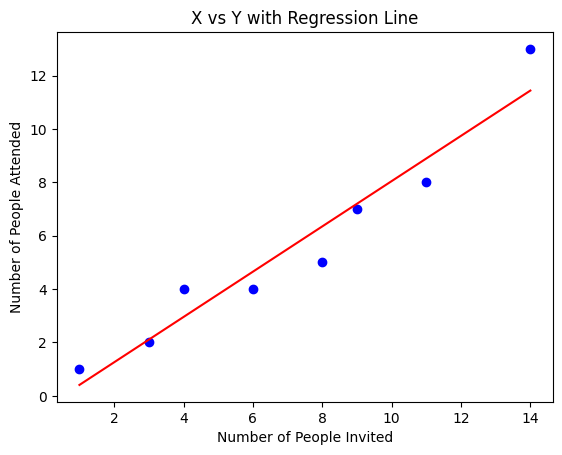

In [13]:

plt.scatter(party_data['X'], party_data['Y'], color='blue')
plt.title('Scatter Plot of X vs Y')
plt.xlabel('Number of People Invited')
plt.ylabel('Number of People Attended')
plt.show()


X_party = party_data['X'].values.reshape(-1, 1)
y_party = party_data['Y']


model_party = LinearRegression()
model_party.fit(X_party, y_party)


plt.scatter(party_data['X'], party_data['Y'], color='blue')
plt.plot(party_data['X'], model_party.predict(X_party), color='red')
plt.title('X vs Y with Regression Line')
plt.xlabel('Number of People Invited')
plt.ylabel('Number of People Attended')
plt.show()


What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

*your explanation here*

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

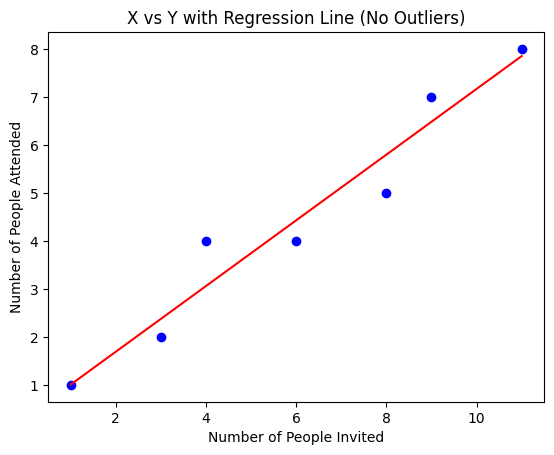

In [14]:

party_data_no_outliers = party_data[party_data['X'] != 14]


X_party_no_outliers = party_data_no_outliers['X'].values.reshape(-1, 1)
y_party_no_outliers = party_data_no_outliers['Y']

model_party_no_outliers = LinearRegression()
model_party_no_outliers.fit(X_party_no_outliers, y_party_no_outliers)


plt.scatter(party_data_no_outliers['X'], party_data_no_outliers['Y'], color='blue')
plt.plot(party_data_no_outliers['X'], model_party_no_outliers.predict(X_party_no_outliers), color='red')
plt.title('X vs Y with Regression Line (No Outliers)')
plt.xlabel('Number of People Invited')
plt.ylabel('Number of People Attended')
plt.show()


What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

*your explanation here*